In [6]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

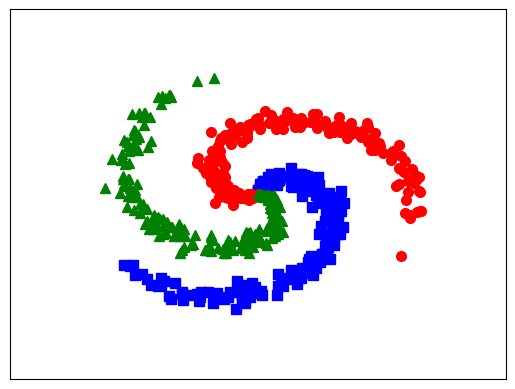

In [8]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [25]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [26]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [31]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [32]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [35]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d , loss : %f" %(i, loss))

    # backpropagation

    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0 , loss : 1.098626
iter 1000 , loss : 0.137522
iter 2000 , loss : 0.053297
iter 3000 , loss : 0.035948
iter 4000 , loss : 0.028526
iter 5000 , loss : 0.024324
iter 6000 , loss : 0.021603
iter 7000 , loss : 0.019609
iter 8000 , loss : 0.018080
iter 9000 , loss : 0.016879


In [37]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %% ' % (acc))

training accuracy: 99.67 % 


(1, 14400)
100


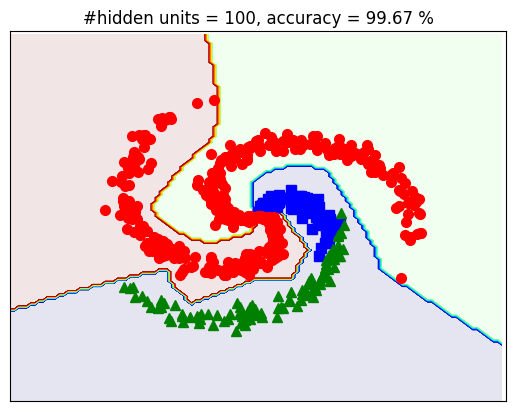

In [39]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 100
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

Ví dụ 2

In [29]:
import os
import numpy as np

data_path = os.path.join(os.getcwd(), 'handwriting')

train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):

    import gzip

    f_images = gzip.open(images_path, 'r')

    f_images.read(16)

    real_num = num_images if not shuffle else (60000 if _is else 10000)

    buf_images = f_images.read(image_size * image_size * real_num)

    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    images = images.reshape(num_images, image_size * image_size)
    return images, labels

images, labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            5000,
                                            shuffle=True)

from sklearn.decomposition import PCA

pca = PCA(n_components=100)
result = pca.fit_transform(images)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(result, labels, train_size=0.7, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.854
Accuracy: 0.854


In [34]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8413333333333334


Ví dụ 3

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# path to the database - change it if needed
path = 'C:\\Users\\Bui Duy\\PycharmProjects\\pythonProject\\face_data\\'

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))

# collect all data
cnt = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        cnt += 1

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA

# remain dim. k = 125 - change it!
pca = PCA(n_components=125)

# then apply to data X
pca.fit(X.T)

# then build projection matrix
U = pca.components_.T


# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images
path_save = 'D:\\Teach_n_Train\\Machine Learning\\code\\yale\\yalefaces_data\\data\\results\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

        # reshape and subtract mean, don't forget
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)

        # encode
        z = U.T.dot(x)

        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

165 77760 243 320


ValueError: n_components=500 must be between 0 and min(n_samples, n_features)=165 with svd_solver='full'